In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

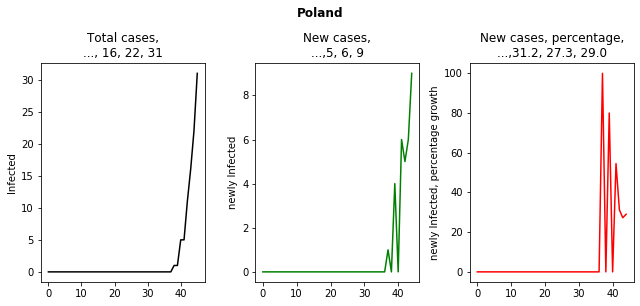

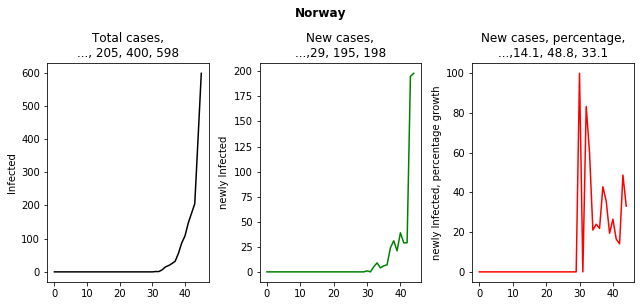

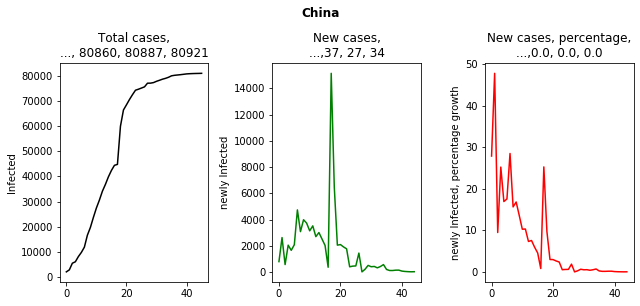

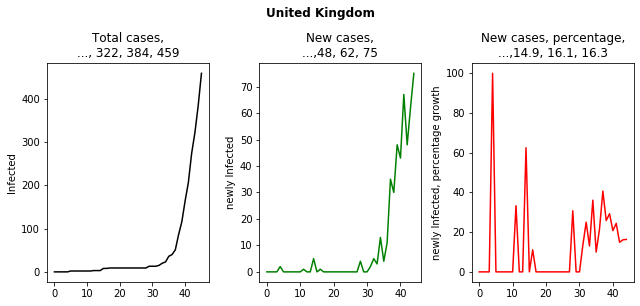

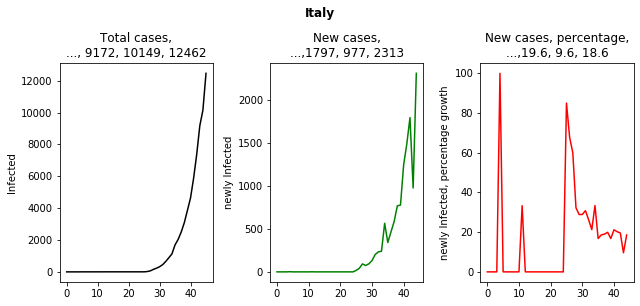

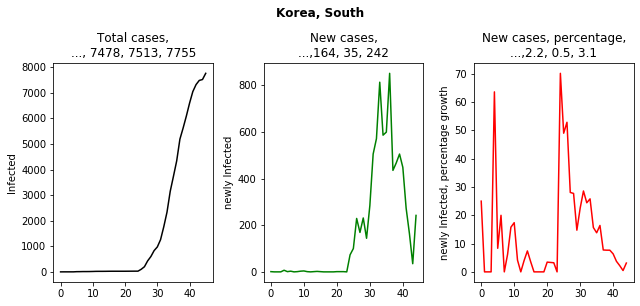

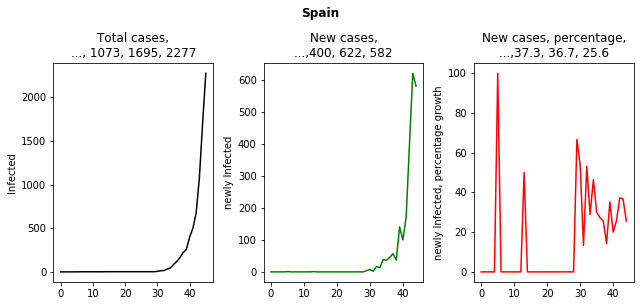

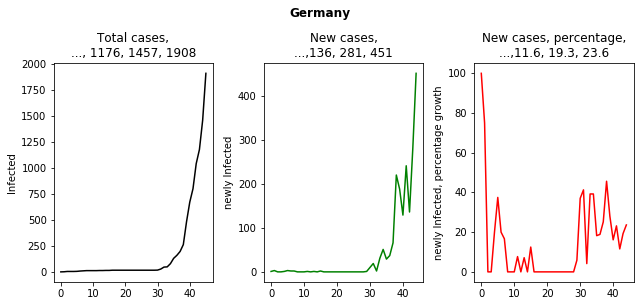

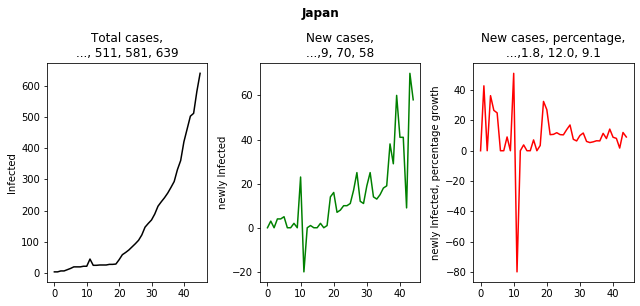

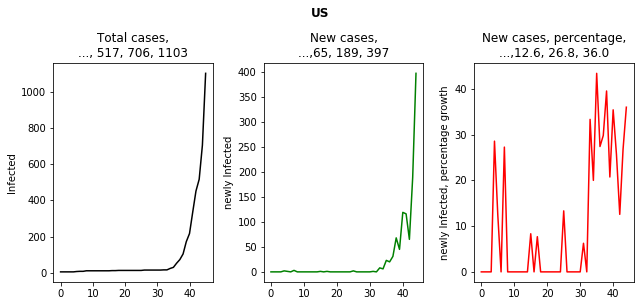

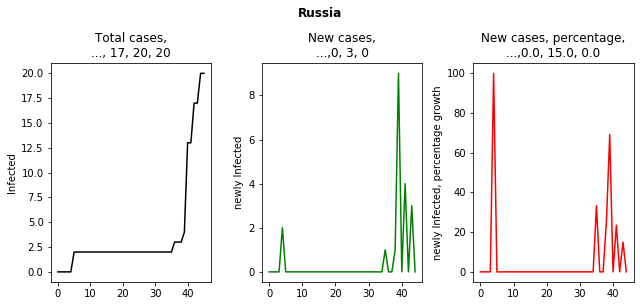

In [4]:
my_countries = ["Poland", "Norway", "China","United Kingdom", "Italy","Korea, South", "Spain", "Germany","Japan", "US", "Russia"]

for country in my_countries:
    df_temp = df[df['Country/Region'] == country]
    
    if country == "US":
        df_temp = df_temp[df_temp['Province/State'].str.contains(",") == True] 
    
    df_temp = df_temp.to_numpy()
       
    df_temp = np.sum(df_temp[:,4:],axis=0)
    df_temp = df_temp[np.newaxis,:]


    
    fig, axs = plt.subplots(1, 3, figsize=(9, 4))

    plt.suptitle(f'{country}\n', y=1.05, weight="bold")  
    axs[0].set_title(f"Total cases,\n..., {df_temp[0,-3]}, {df_temp[0,-2]}, {df_temp[0,-1]}")
    axs[0].set_ylabel(f"Infected")
    axs[0].plot(df_temp[0,4:],c="black")
    
    
    
    axs[1].set_title(f"New cases,\n...,{np.diff(df_temp[0,4:],1)[-3]}, {np.diff(df_temp[0,4:],1)[-2]}, {np.diff(df_temp[0,4:],1)[-1]}")
    axs[1].set_ylabel("newly Infected")
    axs[1].plot(np.diff(df_temp[0,4:],1),c="green")
    
    b = df_temp[0,5:]
    a = np.diff(df_temp[0,4:],1)
    c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    c = c*100
    
    axs[2].set_title(f"New cases, percentage,\n...,{np.round(c[-3],1)}, {np.round(c[-2],1)}, {np.round(c[-1],1)}")
    axs[2].plot(c,c="red")
    axs[2].set_ylabel("newly Infected, percentage growth")
    
    plt.tight_layout()
    plt.show()